# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hwr_20tHIYFyu6mEMxkFYvuPO2WlxFaxb8VrxgSJc0PI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-qk3wipq2p9kn3w'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)

data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-42202270-c891-4253-b4e6-75f01ab4b314',
    'IBM_API_KEY_ID': 'hwr_20tHIYFyu6mEMxkFYvuPO2WlxFaxb8VrxgSJc0PI',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'universityadmiteligibilitypredict-donotdelete-pr-qk3wipq2p9kn3w',
    'FILE': 'Admission_Predict.csv'
}


# Dataset Analysis

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.drop(["Serial No."],axis=1,inplace=True)

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [9]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [10]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in our dataset.

In [11]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [12]:
df = pd.DataFrame(data)

In [13]:
df.columns = df.columns.str.replace(' ', '_')

In [14]:
print("\n\n", df)



      GRE_Score  TOEFL_Score  University_Rating  SOP  LOR_  CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance_of_Admit_  
0                0.92  
1                0.76  


In [55]:
corr_matrix = df.corr()
corr_matrix

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
GRE_Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR_,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit_,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


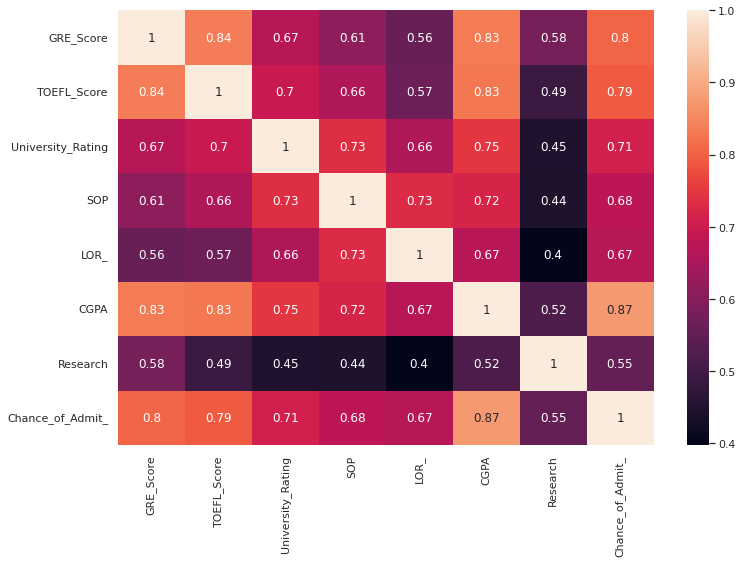

In [56]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

# Visualization

### Countplot

<AxesSubplot:xlabel='Research', ylabel='count'>

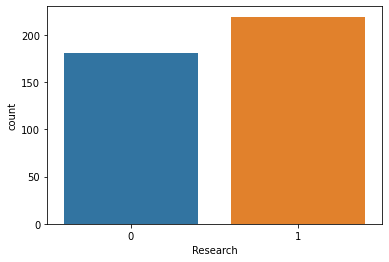

In [15]:
sns.countplot(x="Research",data=data)

<AxesSubplot:xlabel='University_Rating', ylabel='count'>

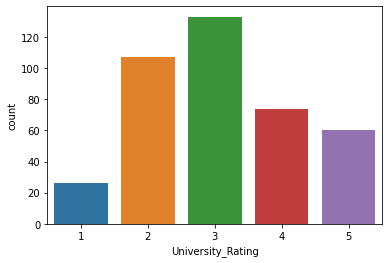

In [16]:
sns.countplot(x="University_Rating",data=data)

### Histogram

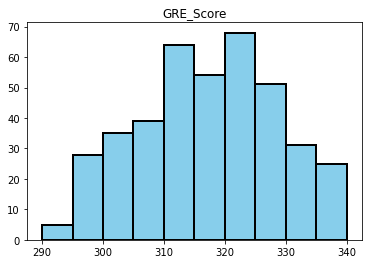

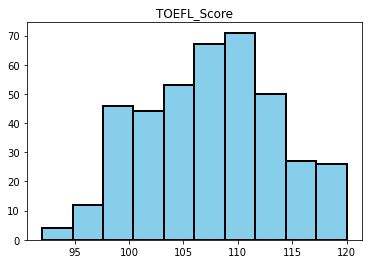

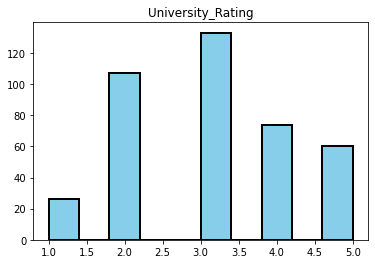

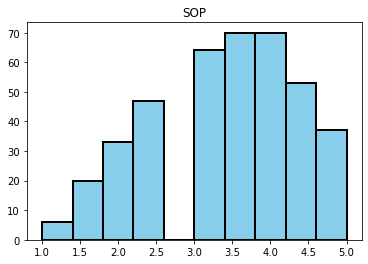

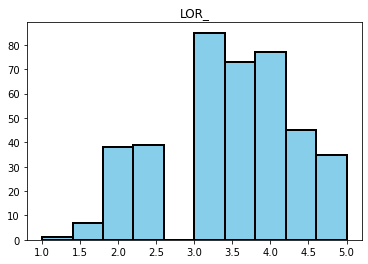

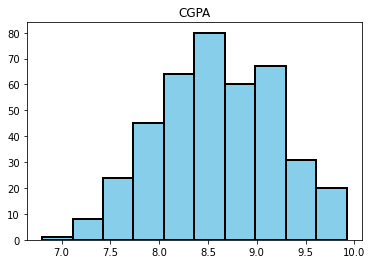

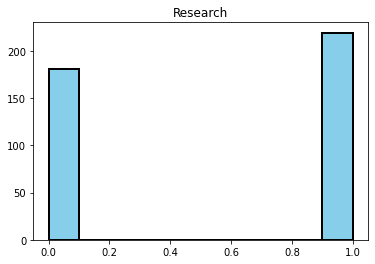

In [17]:
num_features = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR_','CGPA','Research']

for i in num_features:
    plt.hist(df[i], color = "skyblue", lw=0, edgecolor='black', linewidth=2)
    plt.title(i)
    plt.show()

### Relational Plot

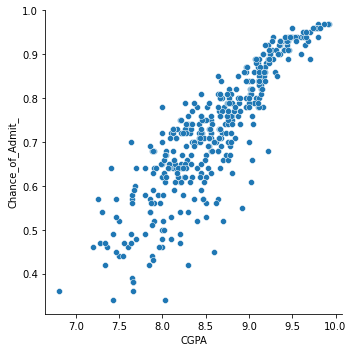

In [18]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',data=data)

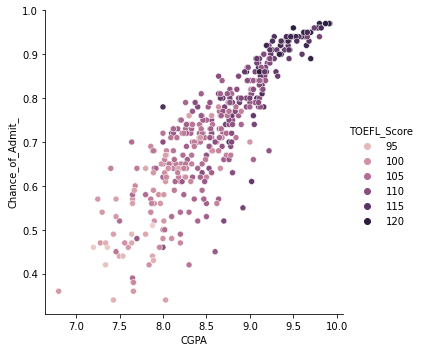

In [19]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',hue='TOEFL_Score',data=data)

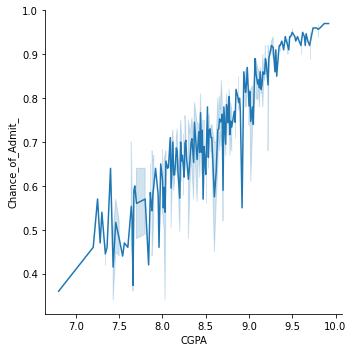

In [20]:
sns.relplot(x='CGPA',y='Chance_of_Admit_',data=data,kind="line")

### FacetGrid

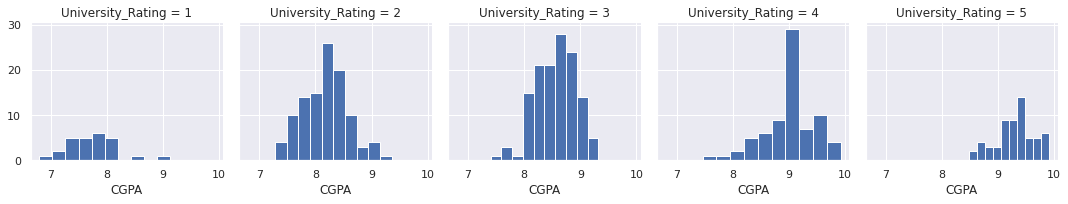

In [21]:
sns.set(style="darkgrid")
b=sns.FacetGrid(data,col="University_Rating")
b.map(plt.hist,"CGPA")

### Pairplot

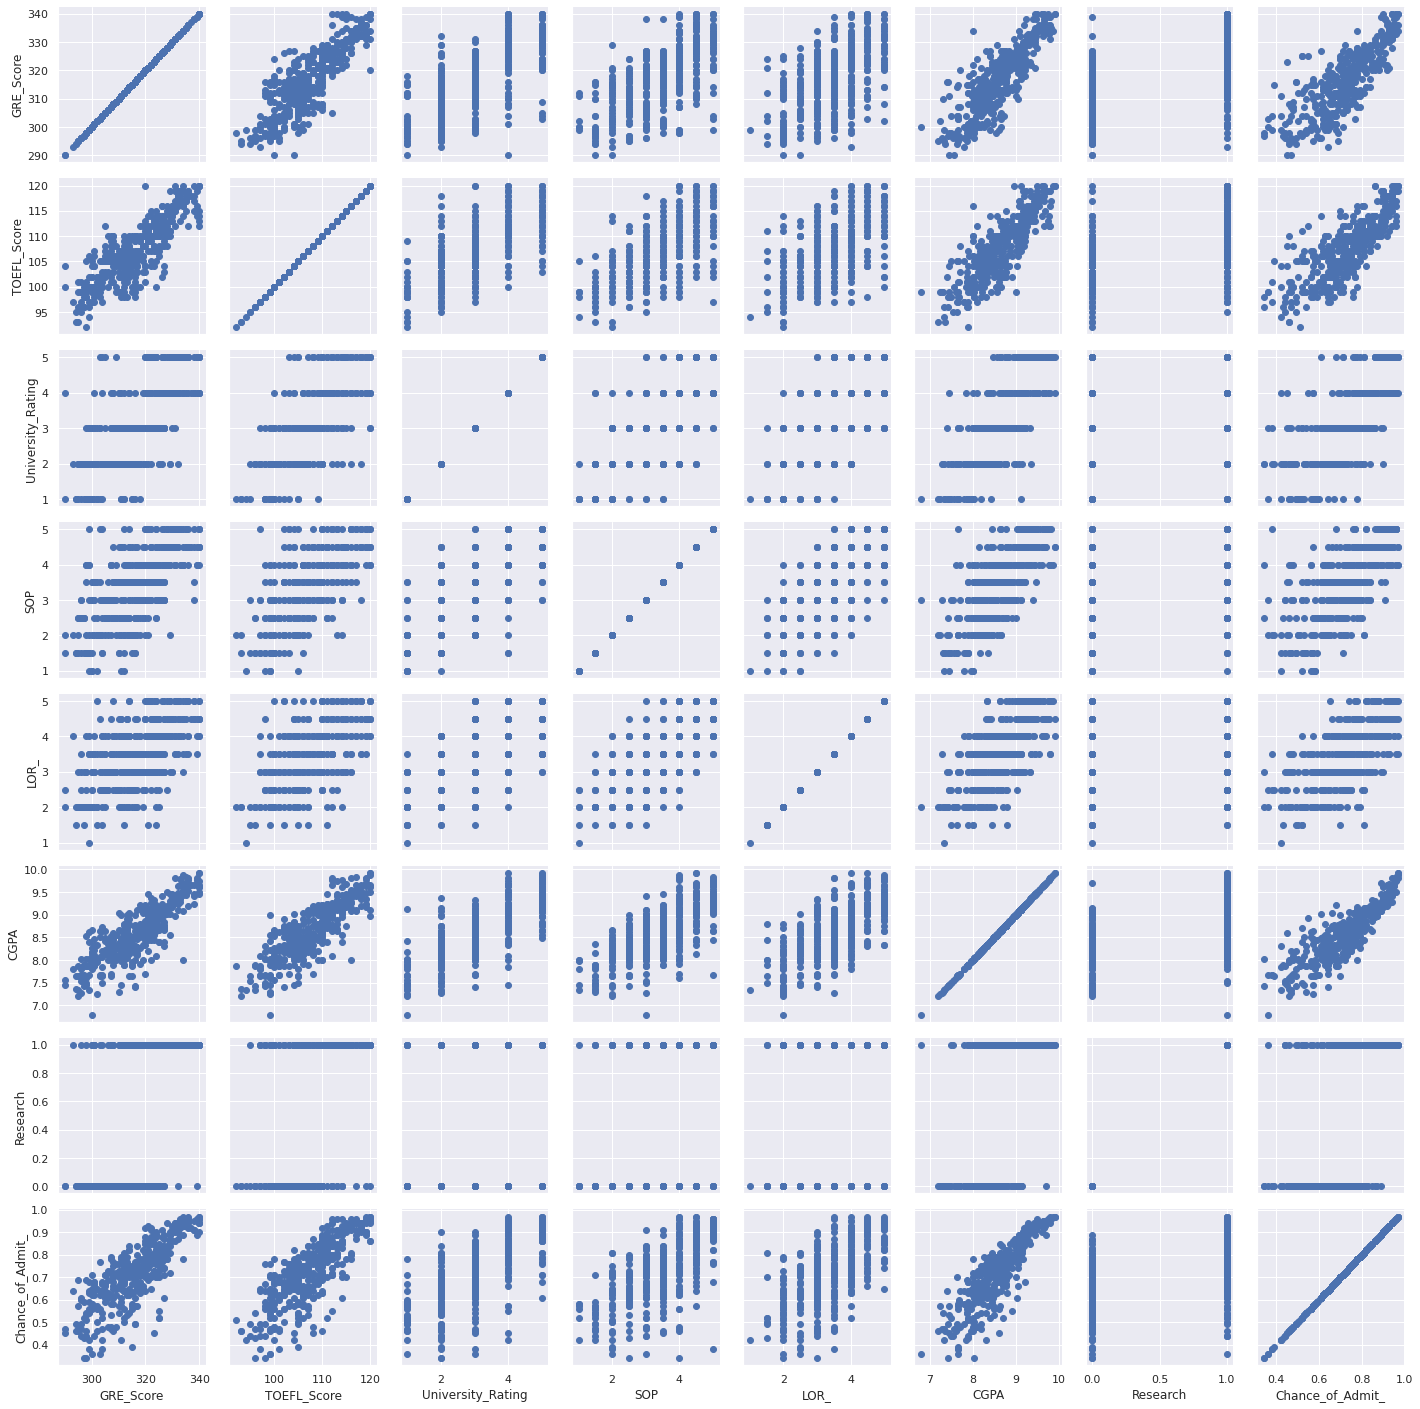

In [22]:
b=sns.PairGrid(data)
b.map(plt.scatter)

### Boxplot

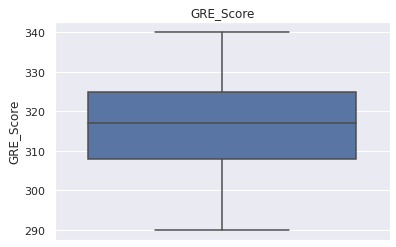

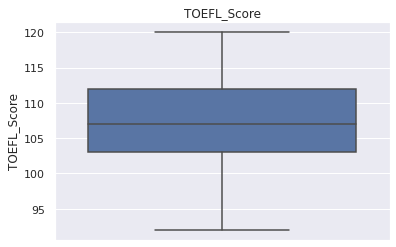

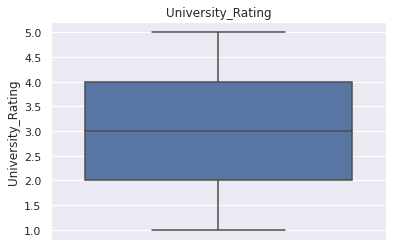

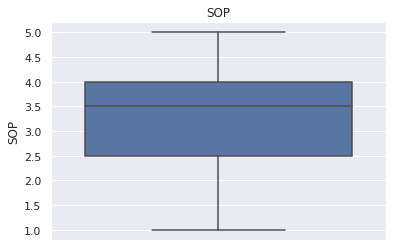

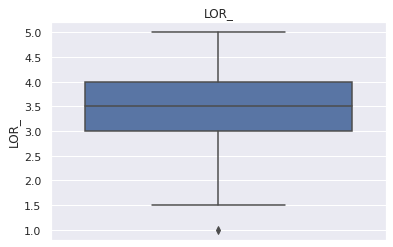

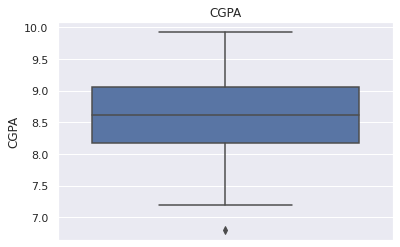

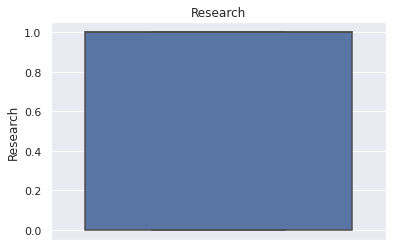

In [23]:
for i in num_features:
    sns.boxplot(y=df[i])
    plt.title(i)
    plt.show()

<AxesSubplot:xlabel='University_Rating', ylabel='Chance_of_Admit_'>

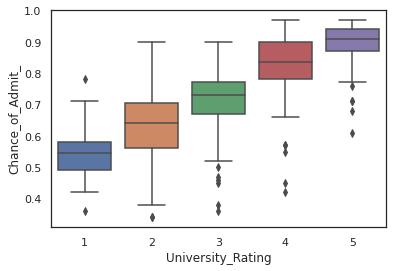

In [24]:
sns.set(style="white",color_codes=True)
sns.boxplot(x='University_Rating',y='Chance_of_Admit_',data=data)

### Lineplot

<AxesSubplot:xlabel='CGPA', ylabel='Chance_of_Admit_'>

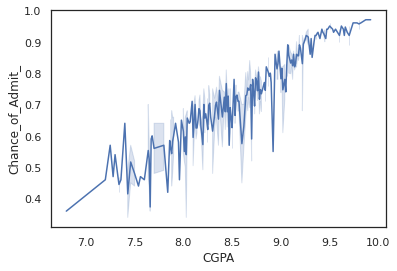

In [25]:
sns.lineplot(x=data.CGPA,y=data.Chance_of_Admit_)

### Heatmap

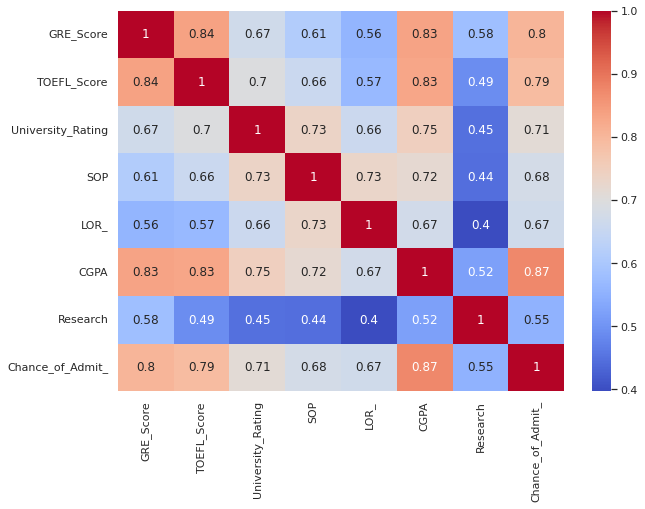

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

# Identifying outliers in our data

we will calculate the outlier data points using the statistical method called interquartile range (IQR)

In [27]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [28]:
outliers = find_outliers_IQR(df)
print(outliers)

     GRE_Score  TOEFL_Score  University_Rating  SOP  LOR_  CGPA  Research  \
0          NaN          NaN                NaN  NaN   NaN   NaN       NaN   
1          NaN          NaN                NaN  NaN   NaN   NaN       NaN   
2          NaN          NaN                NaN  NaN   NaN   NaN       NaN   
3          NaN          NaN                NaN  NaN   NaN   NaN       NaN   
4          NaN          NaN                NaN  NaN   NaN   NaN       NaN   
..         ...          ...                ...  ...   ...   ...       ...   
395        NaN          NaN                NaN  NaN   NaN   NaN       NaN   
396        NaN          NaN                NaN  NaN   NaN   NaN       NaN   
397        NaN          NaN                NaN  NaN   NaN   NaN       NaN   
398        NaN          NaN                NaN  NaN   NaN   NaN       NaN   
399        NaN          NaN                NaN  NaN   NaN   NaN       NaN   

     Chance_of_Admit_  
0                 NaN  
1                 NaN  
2  

Since all the values are NaN, there are no outliers in our data

### Changing the target column from continuous variable to categorical variable.If the chance of admit is greater than 80, then the probability is yes. Else the result is no

In [29]:
df['result']=pd.cut(df.Chance_of_Admit_,bins=[0,0.80,1],labels=['No','Yes'])

In [30]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_,result
0,337,118,4,4.5,4.5,9.65,1,0.92,Yes
1,324,107,4,4.0,4.5,8.87,1,0.76,No
2,316,104,3,3.0,3.5,8.00,1,0.72,No
3,322,110,3,3.5,2.5,8.67,1,0.80,No
4,314,103,2,2.0,3.0,8.21,0,0.65,No
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,Yes
396,325,107,3,3.0,3.5,9.11,1,0.84,Yes
397,330,116,4,5.0,4.5,9.45,1,0.91,Yes
398,312,103,3,3.5,4.0,8.78,0,0.67,No


# Splitting the dataset 

In [31]:
independent = data.iloc[:,0:7].values
dependent = data.iloc[:,8:].values

In [32]:
independent.shape

(400, 7)

In [33]:
dependent.shape

(400, 1)

In [34]:
independent

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [35]:
dependent

array([['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       [

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, random_state=0, train_size = .2)

# Model Selection

### KNN 

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
trained_model = rf.fit(X_train, y_train)

/tmp/wsuser/ipykernel_366/1746950670.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trained_model = rf.fit(X_train, y_train)


In [39]:
import pickle
pickle.dump(rf, open('university.pkl','wb'))

In [40]:
rf_y_pred = rf.predict(X_test)

rf_accuracy=accuracy_score(rf_y_pred,y_test)
print("Accuracy : ",rf_accuracy*100,"%")

Accuracy :  93.125 %


In [41]:
!pip install ibm_watson_machine_learning

In [42]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [43]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"w7wZ3NDUKJjLg9ulwEFwDCKCnOurNNLrzp3gZ-SNrbGO"#changed
} 
client = APIClient(wml_credentials)

In [44]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [45]:
space_uid = guid_from_space_name(client, 'UniversityAdmitEligibilityPredictorIBM')
print("Space UID = " + space_uid)

Space UID = b6964f99-396e-4c35-926c-0910b409215e


In [46]:
client.set.default_space(space_uid)

'SUCCESS'

In [47]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [48]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [49]:
model_details = client.repository.store_model(model=rf,meta_props={
    client.repository.ModelMetaNames.NAME:"Model",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id = client.repository.get_model_id(model_details)

In [50]:
model_id

'c0797f94-1a6a-42ee-8c8b-867603167ebb'

In [51]:
X_train

array([[303.  , 105.  ,   5.  ,   5.  ,   4.5 ,   8.65,   0.  ],
       [301.  , 104.  ,   2.  ,   3.5 ,   3.5 ,   7.89,   1.  ],
       [312.  , 103.  ,   3.  ,   3.5 ,   4.  ,   8.78,   0.  ],
       [308.  , 103.  ,   2.  ,   2.5 ,   4.  ,   8.36,   1.  ],
       [315.  , 104.  ,   3.  ,   3.  ,   2.5 ,   8.33,   0.  ],
       [334.  , 120.  ,   5.  ,   4.  ,   5.  ,   9.87,   1.  ],
       [340.  , 115.  ,   5.  ,   4.5 ,   4.5 ,   9.45,   1.  ],
       [334.  , 119.  ,   5.  ,   4.5 ,   4.5 ,   9.48,   1.  ],
       [316.  ,  98.  ,   1.  ,   1.5 ,   2.  ,   7.43,   0.  ],
       [320.  , 104.  ,   3.  ,   3.5 ,   4.5 ,   8.34,   1.  ],
       [299.  ,  97.  ,   3.  ,   5.  ,   3.5 ,   7.66,   0.  ],
       [320.  , 110.  ,   5.  ,   5.  ,   4.5 ,   9.22,   1.  ],
       [314.  , 107.  ,   3.  ,   3.  ,   3.5 ,   8.17,   1.  ],
       [327.  , 104.  ,   5.  ,   3.  ,   3.5 ,   8.84,   1.  ],
       [300.  , 102.  ,   2.  ,   1.5 ,   2.  ,   7.87,   0.  ],
       [298.  ,  99.  ,  

In [52]:
rf.predict([[303.  , 105.  ,   5.  ,   5.  ,   4.5 ,   8.65,   0.  ],
       [301.  , 104.  ,   2.  ,   3.5 ,   3.5 ,   7.89,   1.  ],
       [312.  , 103.  ,   3.  ,   3.5 ,   4.  ,   8.78,   0.  ],
       [308.  , 103.  ,   2.  ,   2.5 ,   4.  ,   8.36,   1.  ],
       [315.  , 104.  ,   3.  ,   3.  ,   2.5 ,   8.33,   0.  ],
       [334.  , 120.  ,   5.  ,   4.  ,   5.  ,   9.87,   1.  ],
       [340.  , 115.  ,   5.  ,   4.5 ,   4.5 ,   9.45,   1.  ],
       [334.  , 119.  ,   5.  ,   4.5 ,   4.5 ,   9.48,   1.  ],
       [316.  ,  98.  ,   1.  ,   1.5 ,   2.  ,   7.43,   0.  ],
       [320.  , 104.  ,   3.  ,   3.5 ,   4.5 ,   8.34,   1.  ],
       [299.  ,  97.  ,   3.  ,   5.  ,   3.5 ,   7.66,   0.  ],
       [320.  , 110.  ,   5.  ,   5.  ,   4.5 ,   9.22,   1.  ],
       [314.  , 107.  ,   3.  ,   3.  ,   3.5 ,   8.17,   1.  ],
       [327.  , 104.  ,   5.  ,   3.  ,   3.5 ,   8.84,   1.  ],
       [300.  , 102.  ,   2.  ,   1.5 ,   2.  ,   7.87,   0.  ],
       [298.  ,  99.  ,   2.  ,   4.  ,   2.  ,   7.6 ,   0.  ],
       [323.  , 104.  ,   3.  ,   4.  ,   4.  ,   8.44,   1.  ],
       [324.  , 100.  ,   3.  ,   4.  ,   5.  ,   8.64,   1.  ],
       [317.  , 106.  ,   2.  ,   2.  ,   3.5 ,   8.12,   0.  ],
       [313.  , 107.  ,   2.  ,   2.5 ,   2.  ,   8.5 ,   1.  ],
       [316.  , 110.  ,   3.  ,   4.  ,   4.5 ,   8.78,   1.  ],
       [298.  ,  92.  ,   1.  ,   2.  ,   2.  ,   7.88,   0.  ],
       [312.  ,  99.  ,   1.  ,   1.  ,   1.5 ,   8.01,   1.  ],
       [300.  , 102.  ,   3.  ,   3.5 ,   2.5 ,   8.17,   0.  ],
       [304.  , 105.  ,   1.  ,   3.  ,   1.5 ,   7.5 ,   0.  ],
       [324.  , 112.  ,   4.  ,   4.  ,   2.5 ,   8.1 ,   1.  ],
       [299.  ,  94.  ,   1.  ,   1.  ,   1.  ,   7.34,   0.  ],
       [326.  , 112.  ,   3.  ,   3.5 ,   3.  ,   9.1 ,   1.  ],
       [307.  , 105.  ,   2.  ,   2.5 ,   3.  ,   7.65,   0.  ],
       [295.  ,  93.  ,   1.  ,   2.  ,   2.  ,   7.2 ,   0.  ],
       [314.  , 110.  ,   3.  ,   4.  ,   4.  ,   8.8 ,   0.  ],
       [317.  , 105.  ,   3.  ,   3.5 ,   3.  ,   8.56,   0.  ],
       [332.  , 116.  ,   5.  ,   5.  ,   5.  ,   9.28,   1.  ],
       [314.  , 107.  ,   2.  ,   2.5 ,   4.  ,   8.56,   0.  ],
       [340.  , 120.  ,   5.  ,   4.5 ,   4.5 ,   9.91,   1.  ],
       [327.  , 103.  ,   3.  ,   4.  ,   4.  ,   8.3 ,   1.  ],
       [338.  , 118.  ,   4.  ,   3.  ,   4.5 ,   9.4 ,   1.  ],
       [319.  , 112.  ,   3.  ,   2.5 ,   2.  ,   8.71,   1.  ],
       [327.  , 113.  ,   4.  ,   4.5 ,   4.5 ,   9.11,   1.  ],
       [336.  , 119.  ,   4.  ,   4.5 ,   4.  ,   9.62,   1.  ],
       [314.  , 104.  ,   4.  ,   5.  ,   5.  ,   9.02,   0.  ],
       [338.  , 115.  ,   5.  ,   4.5 ,   5.  ,   9.23,   1.  ],
       [326.  , 114.  ,   3.  ,   3.  ,   3.  ,   9.11,   1.  ],
       [331.  , 116.  ,   5.  ,   4.  ,   4.  ,   9.26,   1.  ],
       [310.  , 103.  ,   2.  ,   2.5 ,   2.5 ,   8.24,   0.  ],
       [319.  , 110.  ,   3.  ,   3.5 ,   3.5 ,   9.04,   0.  ],
       [323.  , 113.  ,   3.  ,   4.  ,   4.  ,   8.88,   1.  ],
       [323.  , 108.  ,   5.  ,   4.  ,   4.  ,   8.74,   1.  ],
       [325.  , 111.  ,   4.  ,   4.  ,   4.5 ,   9.11,   1.  ],
       [310.  , 106.  ,   2.  ,   3.5 ,   2.5 ,   8.33,   0.  ],
       [325.  , 114.  ,   3.  ,   3.5 ,   3.  ,   9.04,   1.  ],
       [310.  , 106.  ,   4.  ,   4.5 ,   4.5 ,   9.04,   1.  ],
       [313.  , 102.  ,   3.  ,   2.5 ,   2.5 ,   8.68,   0.  ],
       [321.  , 111.  ,   5.  ,   5.  ,   5.  ,   9.45,   1.  ],
       [319.  , 108.  ,   3.  ,   3.  ,   3.5 ,   8.54,   1.  ],
       [340.  , 120.  ,   5.  ,   4.5 ,   4.5 ,   9.6 ,   1.  ],
       [322.  , 110.  ,   5.  ,   4.5 ,   4.  ,   8.97,   0.  ],
       [332.  , 118.  ,   5.  ,   5.  ,   5.  ,   9.47,   1.  ],
       [340.  , 113.  ,   4.  ,   5.  ,   5.  ,   9.74,   1.  ],
       [321.  , 111.  ,   4.  ,   4.  ,   4.  ,   8.97,   1.  ],
       [302.  , 101.  ,   2.  ,   2.5 ,   3.5 ,   7.96,   0.  ],
       [307.  , 108.  ,   2.  ,   4.  ,   3.5 ,   7.7 ,   0.  ],
       [336.  , 118.  ,   5.  ,   4.5 ,   5.  ,   9.53,   1.  ],
       [305.  , 105.  ,   2.  ,   3.  ,   4.  ,   8.13,   0.  ],
       [314.  , 108.  ,   3.  ,   4.5 ,   3.5 ,   8.14,   0.  ],
       [332.  , 118.  ,   5.  ,   5.  ,   5.  ,   9.64,   1.  ],
       [317.  , 107.  ,   2.  ,   3.5 ,   3.  ,   8.28,   0.  ],
       [302.  ,  99.  ,   2.  ,   1.  ,   2.  ,   7.97,   0.  ],
       [324.  , 115.  ,   3.  ,   3.5 ,   3.  ,   8.76,   1.  ],
       [320.  , 101.  ,   2.  ,   2.5 ,   3.  ,   8.62,   0.  ],
       [328.  , 110.  ,   4.  ,   5.  ,   4.  ,   9.14,   1.  ],
       [323.  , 108.  ,   3.  ,   3.5 ,   3.  ,   8.6 ,   0.  ],
       [321.  , 107.  ,   2.  ,   2.  ,   1.5 ,   8.44,   0.  ],
       [307.  , 107.  ,   2.  ,   3.  ,   3.5 ,   8.52,   1.  ],
       [316.  ,  99.  ,   2.  ,   2.5 ,   3.  ,   9.  ,   0.  ],
       [305.  , 102.  ,   2.  ,   2.  ,   2.5 ,   8.18,   0.  ],
       [322.  , 114.  ,   5.  ,   4.5 ,   4.  ,   8.94,   1.  ],
       [290.  , 104.  ,   4.  ,   2.  ,   2.5 ,   7.46,   0.  ],
       [339.  , 119.  ,   5.  ,   4.5 ,   4.  ,   9.7 ,   0.  ],
       [322.  , 110.  ,   4.  ,   4.  ,   5.  ,   9.13,   1.  ]])

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [59]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "w7wZ3NDUKJjLg9ulwEFwDCKCnOurNNLrzp3gZ-SNrbGO"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]], "values": [[322, 110, 3, 3.5,2.5,8.67,1]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/67f91885-c382-4d94-9b23-60bbc3f65a47/predictions?version=2022-11-18', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction', 'probability'], 'values': [['No', [0.88, 0.12]]]}]}


In [61]:
probability = response_scoring.json()['predictions'][0]['values'][0][0][0]
probability

'N'